<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/ML/ClusterAlgorithm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#비지도 학습
타깃(정답)이 없을 때 사용하는 학습 방식

##군집 알고리즘
클러스터

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# !앞에 붙이면 코드가 아닌 리눅스 쉘 명령어로 해석함
# wget=webget, 주소->가져올 주소, -O->output이름 지정, 파일 이름 -> 다운한 파일 이름 지정
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2026-02-08 08:07:34--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2026-02-08 08:07:34--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2026-02-08 08:07:35--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

(300, 100, 100)
[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]



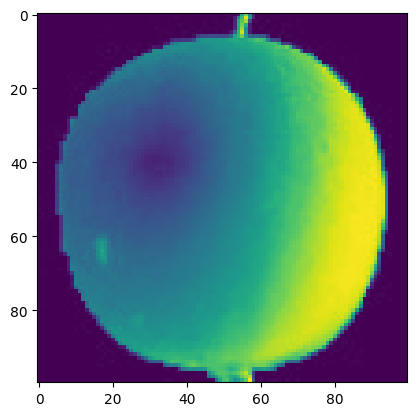

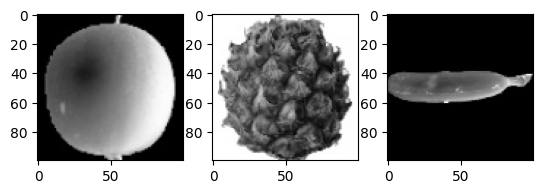

In [9]:

fruits = np.load('fruits_300.npy')
# 300,100,100 -> 샘플 개수, 이미지 높이, 이미지 너비
print(fruits.shape)

#0번째 이미지의 첫 번째 행 모두 출력, 밝으면 높은 값
print(fruits[0,0,:])
print()

#imshow ->무엇을 그릴지 정하는 함수
plt.imshow(fruits[0])
#지금까지 그린걸 띄우는 함수
plt.show()

#이미지를 1개행, 3개열로 쌓아서 출력 fig -> 전체 객체, aws-> 각각의 그래프(그림)
fig,axs = plt.subplots(1,3)
#이미지 3개 출력, cmap->어떤 색으로 출력할지, gray_r -> 반전하여 출력
axs[0].imshow(fruits[0], cmap='gray')
axs[1].imshow(fruits[100], cmap='gray')
axs[2].imshow(fruits[200], cmap='gray')
plt.show()


(100, 10000)
[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


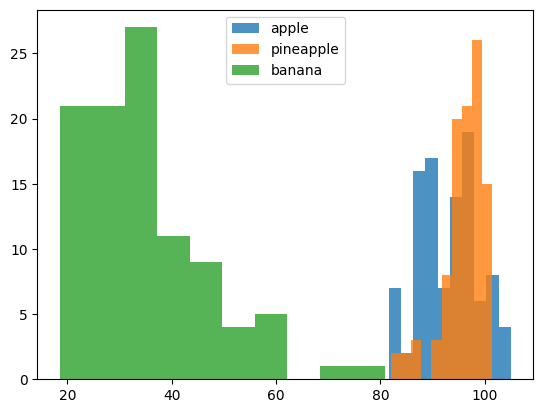

In [16]:
# 100*100을 10000 1차원 배열로 바꿈(계산 편리)
# -1 -> 자동으로 차원 정하기 100으로 계산
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

# 100,100,100이 100,10000으로 바뀜
print(apple.shape)

#사과 샘플 100개에 대한 픽셀 평균값
#axis=0->행, 1=열 방향(같은 행끼리 계산)
# np.mean(apple, axis=1)과 같음, numpy에 내장된 기능
print(apple.mean(axis=1))

#히스토그램화, alpha= 투명화 정도,
plt.hist(apple.mean(axis=1), alpha=0.8, label='apple')
plt.hist(pineapple.mean(axis=1), alpha=0.8, label='pineapple')
plt.hist(banana.mean(axis=1), alpha=0.8, label='banana')
#그래프에 범례(설명표)를 붙임
plt.legend()
#사과 파인애플 구분이 어려움
plt.show()


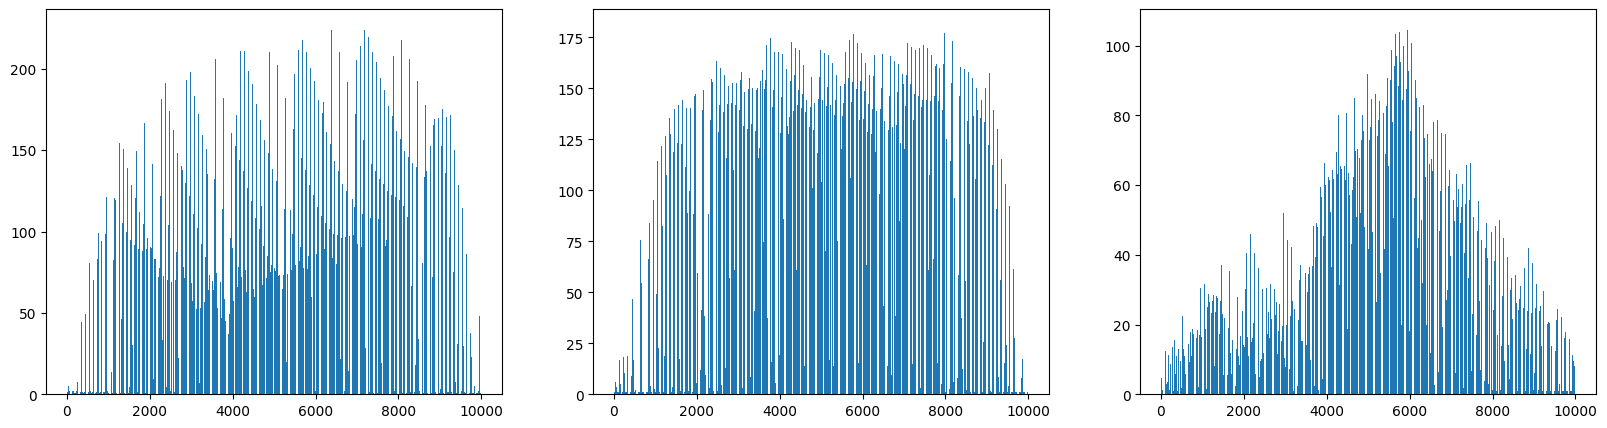

In [18]:
# 샘플의 평균값이 아닌 픽셀별 평균값을 구함 ex) [0,0]의 평균
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].bar(range(10000), apple.mean(axis=0))
axs[1].bar(range(10000), pineapple.mean(axis=0))
axs[2].bar(range(10000), banana.mean(axis=0))
plt.show()

#뭔가 차이가 보임

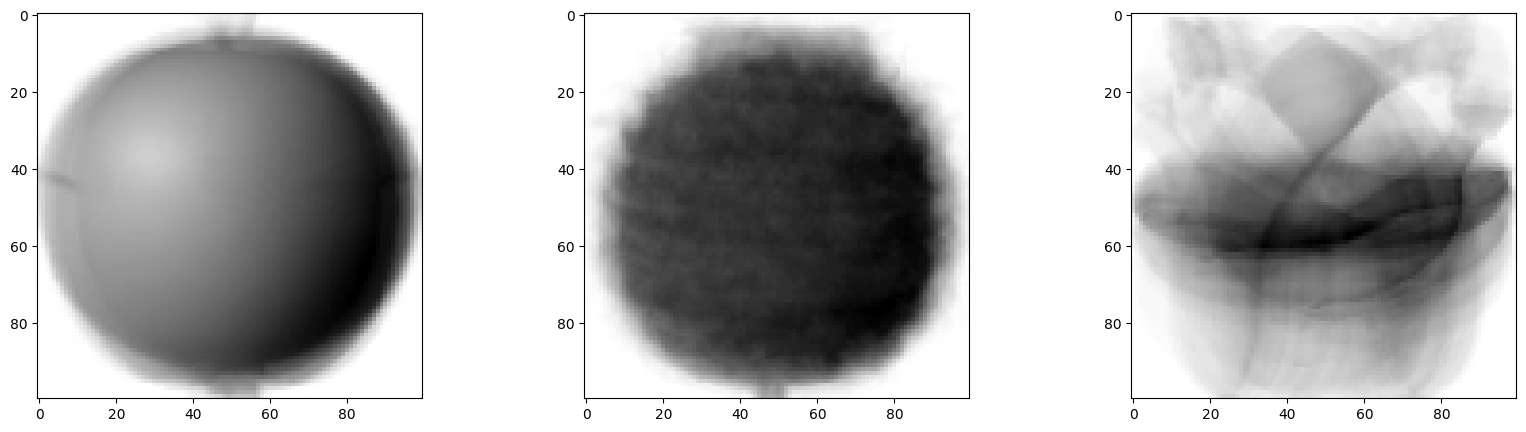

In [20]:
# 픽셀별 평균값을 100*100크기로 바꾸고 이미지화
apple_mean= apple.mean(axis=0).reshape(100,100)
pineapple_mean=pineapple.mean(axis=0).reshape(100,100)
banana_mean=banana.mean(axis=0).reshape(100,100)
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

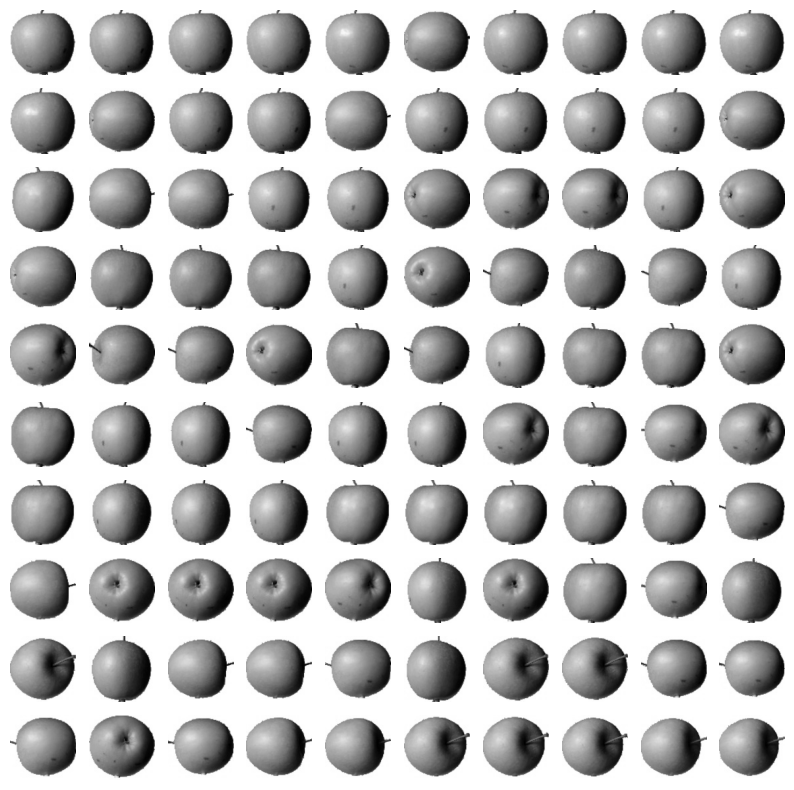

In [32]:
#apple_mena과의 절댓값 오차를 계산

#각 이미지의 모든 픽셀에서 평균 사과 이미지의 차 절댓값 계산(300,100,100크기)
abs_diff=np.abs(fruits-apple_mean)
"""
axis=하고 숫자 기준이 shape 했을때 순서임
3차원이면(300,100,100) -> axis=0은 이미지 인덱스, 1=세로, 2=가로
"""
#각 이미지를 각각 픽셀 전체 평균값으로 바꿈,1=가로,2=세로(즉 100*100전체를 평균)
# shape는 300
abs_mean=abs_diff.mean(axis=(1,2))

# argsort=오름차순 정렬, [:100]->100개 선택 앞에서부터
apple_index = np.argsort(abs_mean)[:100]
apple_index = apple_index.reshape(10,10)
# figsize -> 그래프 크기 설정
fig,axs = plt.subplots(10,10, figsize=(10,10))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i,j]], cmap='gray_r')
    axs[i,j].axis('off')
plt.show()